In [52]:
#SVM demo

from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
import sklearn

theme = 'seismic'

from sklearn.datasets import make_blobs

In [53]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=1.3)

In [54]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

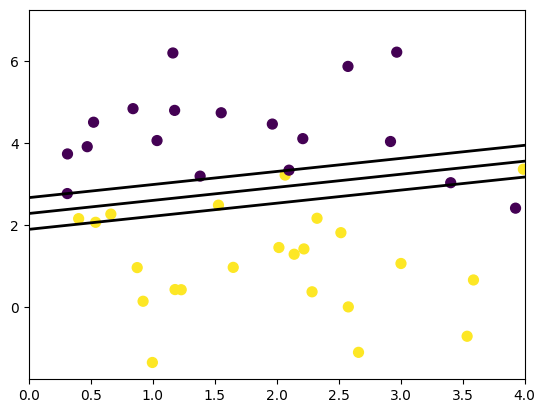

In [55]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary+margin
    gutter_down = decision_boundary-margin
    svs = svm_clf.support_vectors_
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k-", linewidth=2)
    plt.plot(x0, gutter_down, "k-", linewidth=2)

plt.scatter(X[:,0], X[:,1], c=y, s=50)

svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(X,y)

plt.xlim(0,4)
plot_svc_decision_boundary(svm_clf,0,4)

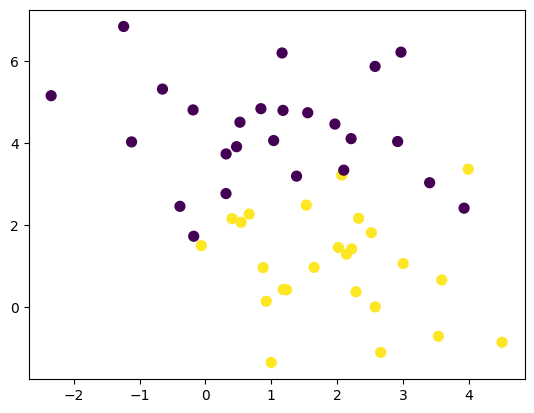

In [56]:
plt.scatter(X[:,0], X[:,1], c=y, s=50)

In [57]:
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(X,y)



SVC(C=100, kernel='linear')

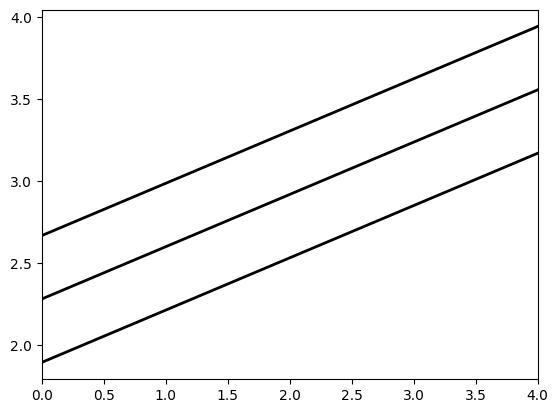

In [58]:
plt.xlim(0,4)
plot_svc_decision_boundary(svm_clf,0,4)

In [59]:
svm_clf.predict(X)

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [60]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [61]:
from sklearn.datasets import load_iris


In [62]:
data = load_iris()
X,y = data.data[:, (2,3)], data.target

In [63]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
setosa_and_versicolor = (y==0) | (y==1)

X = X[setosa_and_versicolor]
y = y[setosa_and_versicolor]

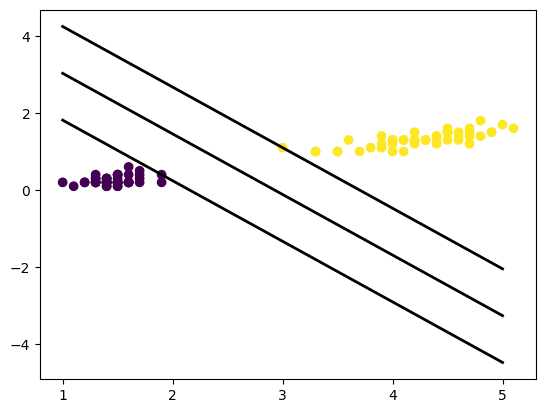

In [65]:
plt.scatter(X[:,0], X[:,1], c=y, marker='o')

svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(X,y)

plot_svc_decision_boundary(svm_clf, 1,5)

In [66]:
# polynomial kernel
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.2)

In [67]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap='seismic', alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap='seismic', alpha=0.1)


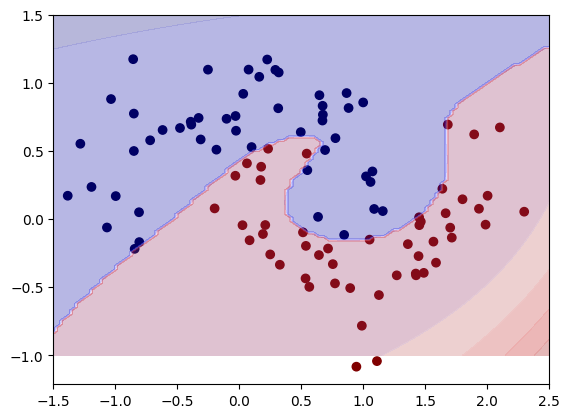

In [68]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic')
svm_clf = SVC(kernel='poly', degree=9, coef0=7, C=1000)
svm_clf.fit(X,y)
plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])

In [69]:
# RBF kernel

X,y = make_moons(n_samples=100, noise=0.2)

In [70]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=theme, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=theme, alpha=0.1)

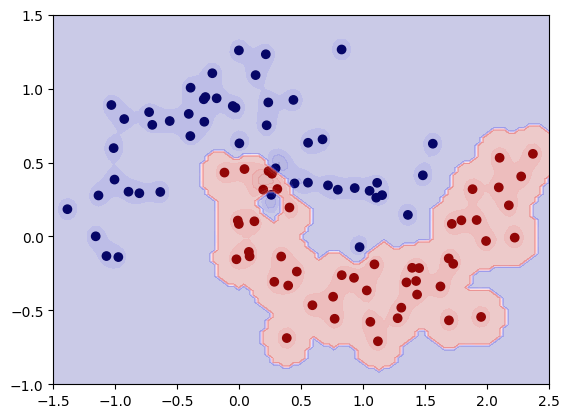

In [71]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic')

svm_clf = SVC(kernel='rbf', gamma=100, C=20)
svm_clf.fit(X,y)
plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])

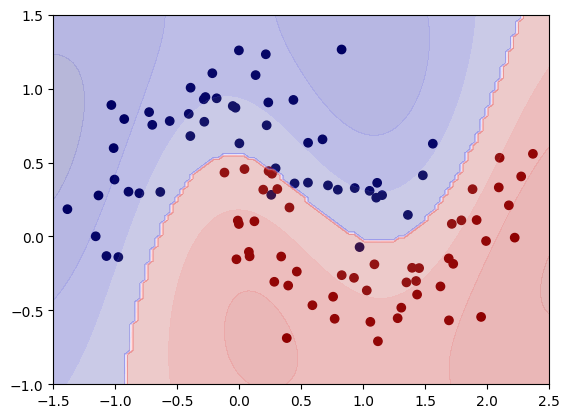

In [72]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic')

svm_clf = SVC(kernel='rbf', gamma=0.4, C=20)
svm_clf.fit(X,y)

plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])

In [73]:
# SVM REGRESSION

from sklearn.svm import LinearSVR

In [74]:
np.random.seed(50)
m=100
X=3*np.random.rand(m,1)
y=(5+2*X+np.random.randn(m,1)).ravel()

In [75]:
def plot_svm_regression(svm_reg, X,y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2)
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    plt.plot(X,y,'bo')
    plt.axis(axes)

/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


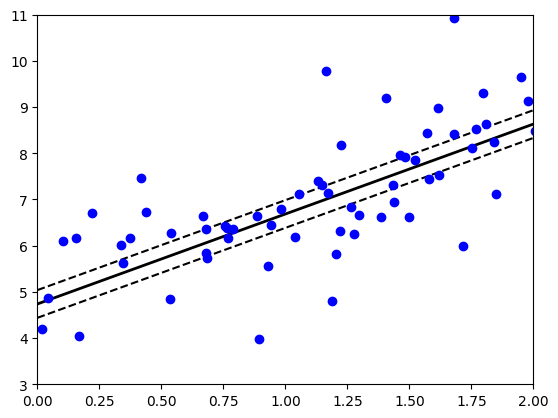

In [76]:
svm_reg = LinearSVR(epsilon=0.3)
svm_reg.fit(X,y)
plot_svm_regression(svm_reg, X,y, [0,2,3,11])

In [77]:
import pandas as pd
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [78]:
bikes.head(
    
)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [79]:
X = bikes[['temp','atemp','humidity','windspeed']]
y = bikes['count']

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [82]:
linreg = LinearRegression()
reg_model = linreg.fit(X_train,y_train)

In [83]:
pred = reg_model.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_test, pred))

155.5643482887117

In [85]:
lin_SVR = LinearSVR(epsilon=10)
linsvr = lin_SVR.fit(X_train,y_train)
pred2 = linsvr.predict(X_test)


/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [86]:
np.sqrt(mean_squared_error(y_test, pred2))

160.50244970756438

In [87]:
params = {'epsilon':np.linspace(0,1,10),
          'max_iter':[1000,5000,10000]}

In [88]:
random_search = RandomizedSearchCV(estimator=linsvr,
                                   param_distributions=params,
                                   n_iter=50,
                                   scoring='neg_mean_absolute_error',
                                   cv=5)

In [89]:
random_search.fit(X_train, y_train)

/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/delinaivanova/Library/Py

RandomizedSearchCV(cv=5, estimator=LinearSVR(epsilon=10), n_iter=50,
                   param_distributions={'epsilon': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'max_iter': [1000, 5000, 10000]},
                   scoring='neg_mean_absolute_error')

In [90]:
random_search.best_params_

{'max_iter': 1000, 'epsilon': 0.0}

In [91]:
bikes['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [92]:
bikes['binary_output'] = bikes['count'].apply(lambda x: 1 if x >= 145 else 0)

In [93]:
svc = SVC()

In [94]:
params = {
    'C':np.linspace(1,4,20),
    'gamma': np.linspace(1,4,20),
    'kernel':['linear','rbf','poly']

}

In [95]:
#random_search.fit(X_train, y_train)

In [96]:
#random_search.best_params_

In [97]:
data = load_iris()
X,y = data.data[:, (2,3)], data.target
setosa_and_versicolor = (y==0) | (y==1)

X = X[setosa_and_versicolor]
y = y[setosa_and_versicolor]

In [98]:
params = {
    'C':np.logspace(-4,4,20),
    'gamma': np.logspace(-4,4,20),
    'kernel':['linear','rbf','poly']

}

In [99]:
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=params,
    n_iter=50,
    scoring='accuracy',
    cv=5
)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [101]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+0...
                                        'gamma': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

In [102]:
random_search.best_estimator_

SVC(C=0.23357214690901212, gamma=1.623776739188721)